# Exploration03 - 스티커 붙히기 - 가까이에서 찍은 사진

## 패키지 import

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

## 이미지 불러오기

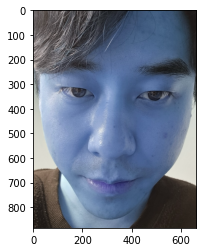

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/big2.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_original = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

opencv에서는 색상을 BGR 순으로 사용하기 때문에 색상이 원본과 다르게 보임  
(matplotlib, dlib 등은 RGB 순으로 사용)

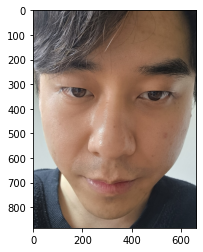

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 얼굴에서의 bounding box 추출

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
# dlib_rects = detector_hog(img_rgb, 1)

In [5]:
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[]


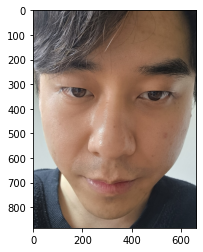

In [6]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_original, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_original_rgb =  cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
plt.imshow(img_original_rgb)
plt.show()

## 랜드마크 불러오기

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

IndexError: list index out of range

## 결과
- **얼굴 크기가 너무 크면 랜드마크의 인식 범위가 이미지 밖으로 넘어감 (에러 발생)**
- 이미지 사이즈 대비 얼굴이 너무 크면 실험을 하기 어려움